In [1]:

%matplotlib widget
import numpy as np
import cmath
import matplotlib.pyplot as plt
import os
print(os.getpid())
%cd ../

import pylib.mix as mix
import pylib.measurement as mse
import est_qsvt as eqsvt

32260
c:\Users\novikau1\Documents\work\codes\QuCF\scripts-py


In [2]:
for i in range(30):
    plt.close()

In [3]:
# ----------------------------------------------------------------------
# Compute coefficients for the estimation of the QSVT angles necessary
# for the inversion of a matrix with an arbitrary condition number.
# ----------------------------------------------------------------------

In [4]:
# -----------------------------------------
# --- Read data ----
# -----------------------------------------
mix.reload_module(eqsvt)

id_case_ = 4
Ncoefs_ = 20
dds_, id_comp_, fname_, path_root_, path_save_plots_ = eqsvt.read_ref_QSVT_angles(id_case_, Ncoefs_)


----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-3/k10_eps11.hdf5
when simulated:  02-04-2024 16:21:20

function-type: 		inversion
function-parity: 		1
param: 			10.000000
absolute error: 	1.554e-11
norm. factor: 		1.250e-01
Number of angles: 	456

----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-3/k20_eps11.hdf5
when simulated:  02-04-2024 16:21:43

function-type: 		inversion
function-parity: 		1
param: 			20.000000
absolute error: 	1.018e-11
norm. factor: 		1.250e-01
Number of angles: 	920

----------------------------------------
Reading angles from the file 
./tools/QSVT-angles/inversion/ref-angles-3/k30_eps11.hdf5
when simulated:  02-04-2024 16:22:25

function-type: 		inversion
function-parity: 		1
param: 			30.000000
absolute error: 	9.355e-12
norm. factor: 		1.250e-01
Number of angles: 	1382

----------------------------------------
Reading angles from t

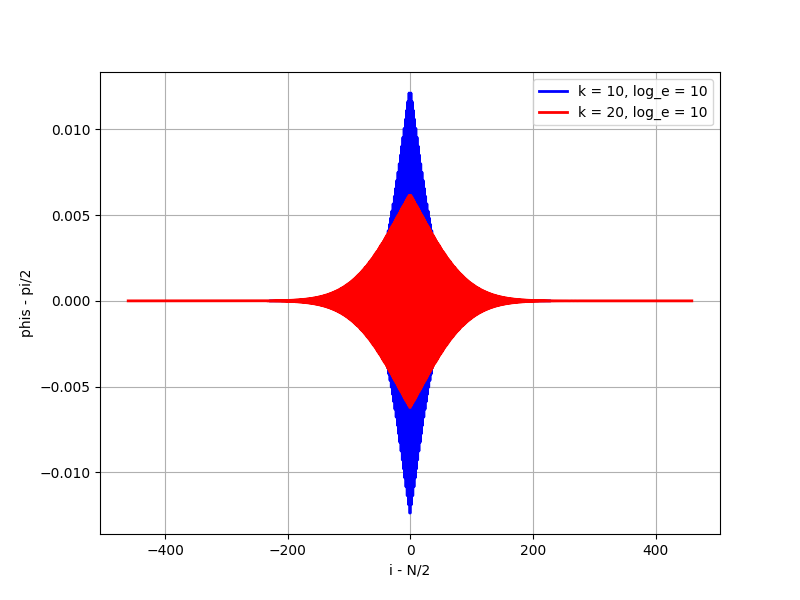

write data to a file: ./tools/QSVT-angles/inversion//saved-plots//phis_k10.dat
write data to a file: ./tools/QSVT-angles/inversion//saved-plots//phis_k20.dat


In [8]:
# -----------------------------------------
# --- Plot angles ----
# -----------------------------------------
mix.reload_module(eqsvt)

# plot_angles([0,1], xlim = [-10, 10]) 
# eqsvt.plot_angles(dds_, [id_comp_]) 

eqsvt.plot_angles(
    dds_, 
    [0, 1], 
    flag_save = True,
    path_save_plots = path_save_plots_
) 

maximum difference between pos. and neg. max angles: 2.480e-04


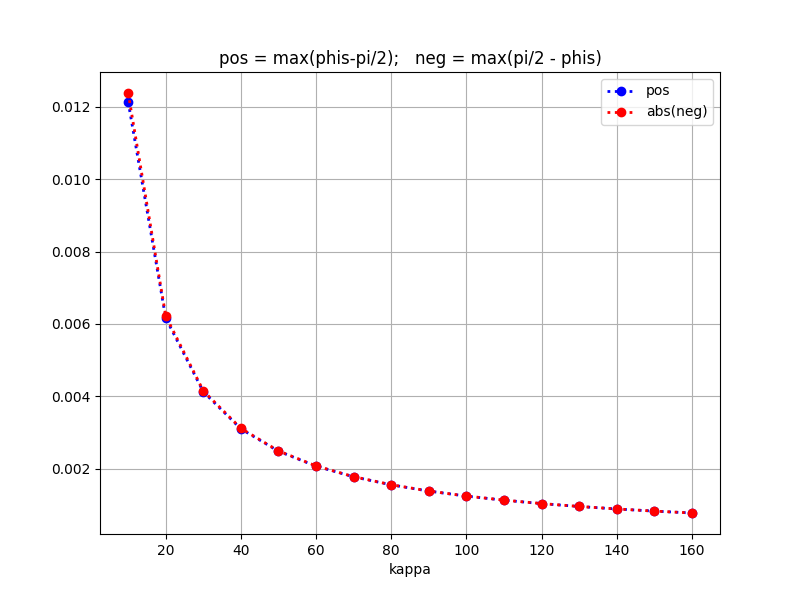

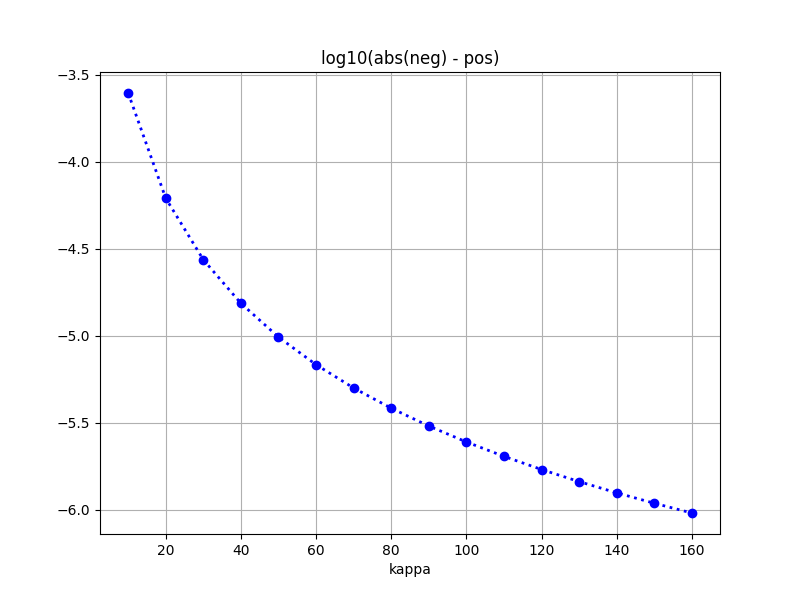

In [6]:
# ------------------------------------------
# --- Plot miximum values of the angles ----
# ------------------------------------------
mix.reload_module(eqsvt)
eqsvt.plot_max(dds_)


--- Estimation coefs for neg amplitudes ---
max. abs. err: 2.896e-13


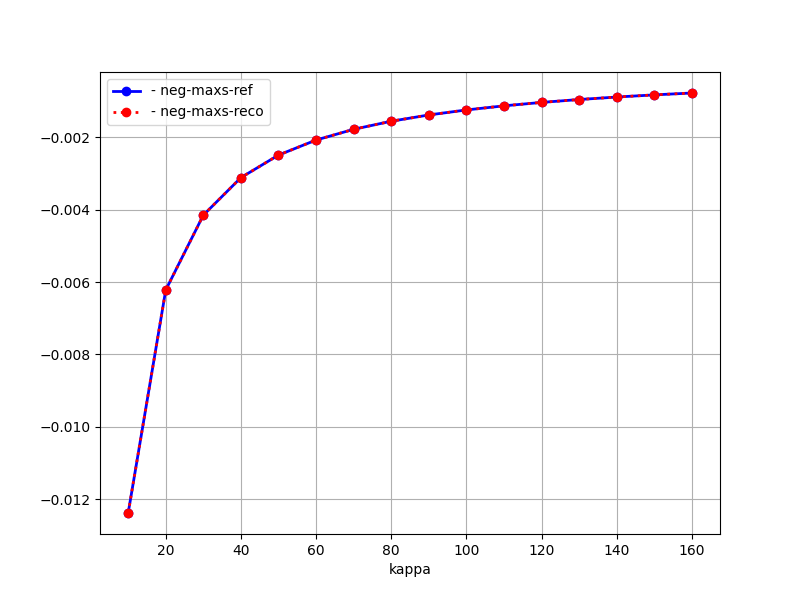


--- Estimation coefs for pos amplitudes ---
max. abs. err: 6.277e-10


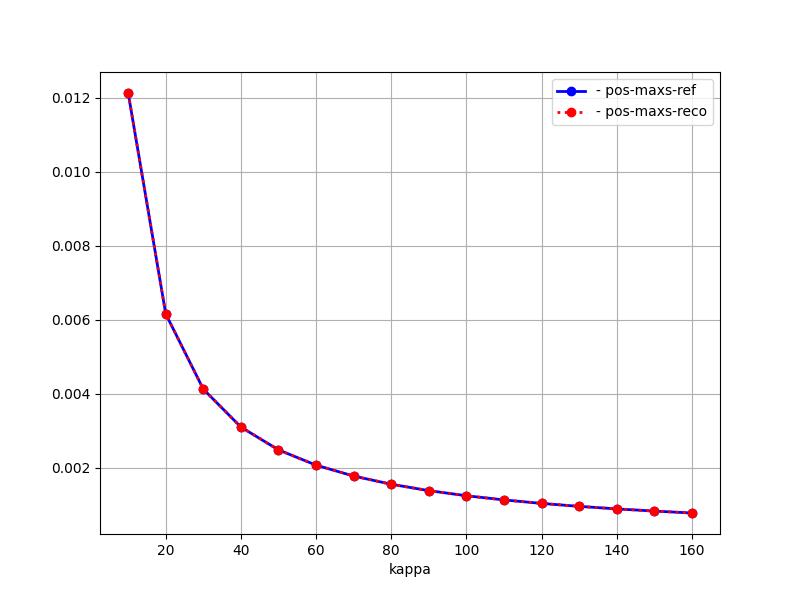

In [7]:
# ---------------------------------------------------------------------------------------------------
# --- COMPUTE the coefficients to describe the change in the maximum and minimum angles ---
mix.reload_module(eqsvt)
coefs_ampl_neg_, coefs_ampl_pos_ = eqsvt.compute_coefs_amplitudes(
    dds_,
    Ncoefs = 4
)


--- Estimation coefs for neg Na ---
max. abs. err: 8.391e+00


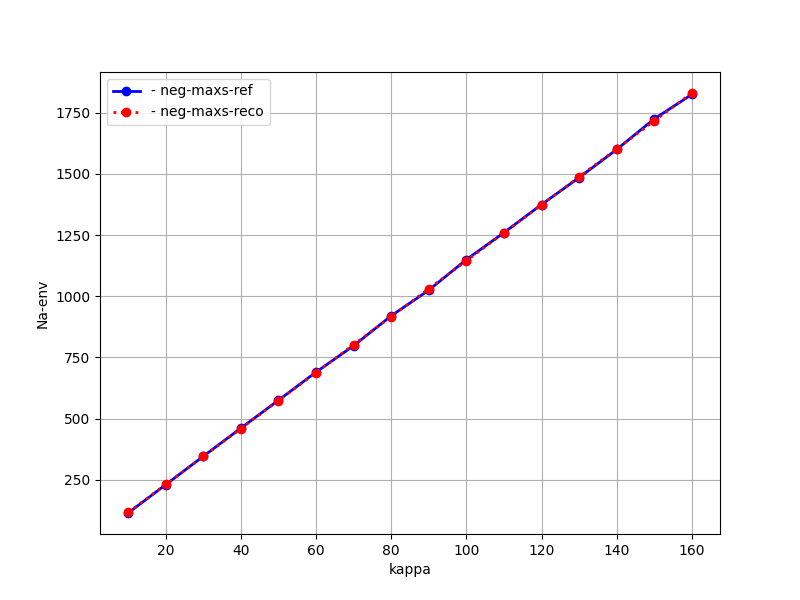


--- Estimation coefs for pos Na ---
max. abs. err: 8.359e+00


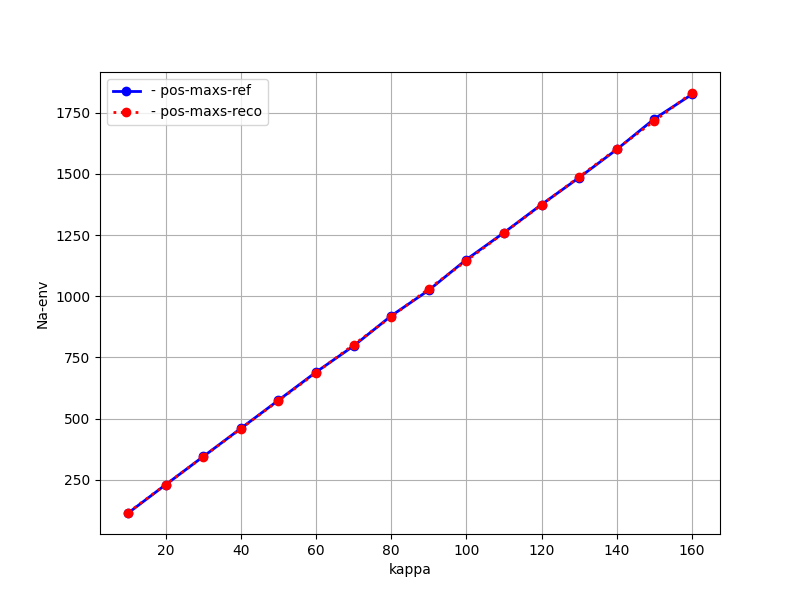

[ 2.175 11.43 ]
[ 1.7   11.433]


In [17]:
# ---------------------------------------------------------------------------------------------------
# --- COMPUTE the coefficients to describe the change in the number of angles for each envelop ---
mix.reload_module(eqsvt)
coefs_Na_neg_, coefs_Na_pos_ = eqsvt.compute_coefs_Na(
    dds_,
    Ncoefs = 2
)
print(coefs_Na_neg_)
print(coefs_Na_pos_)


full number of angles: 3190
N of NEG. peaks: 1596
N of POS. peaks: 1594

N_env-half-NEG: 798
N_env-half-POS: 797
The envelop for the kappa = 70 is taken.


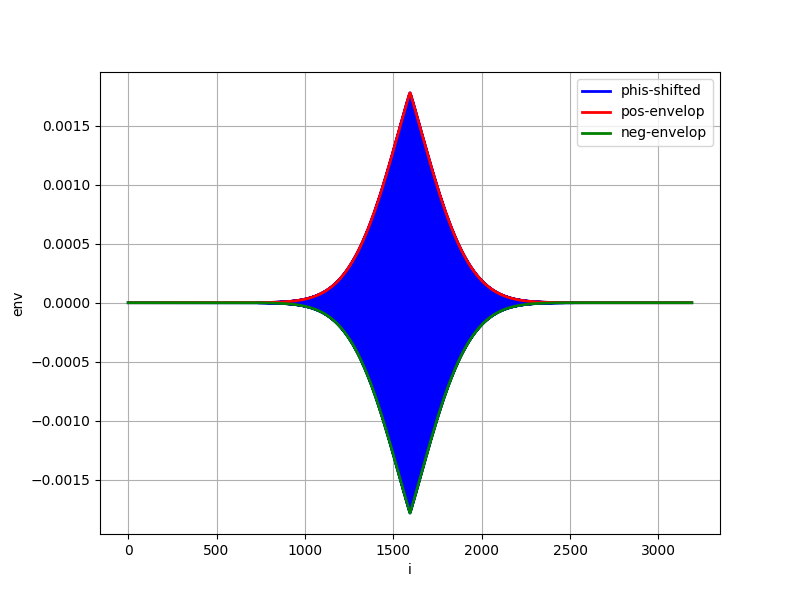

Normalized POS. ENV: max. absolute error: 5.312e-11
Normalized NEG. ENV: max. absolute error: 5.316e-11


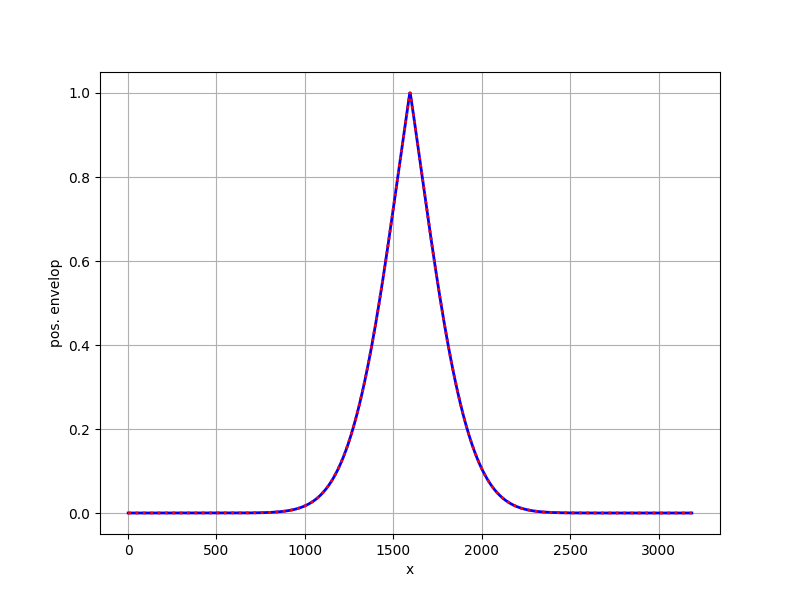

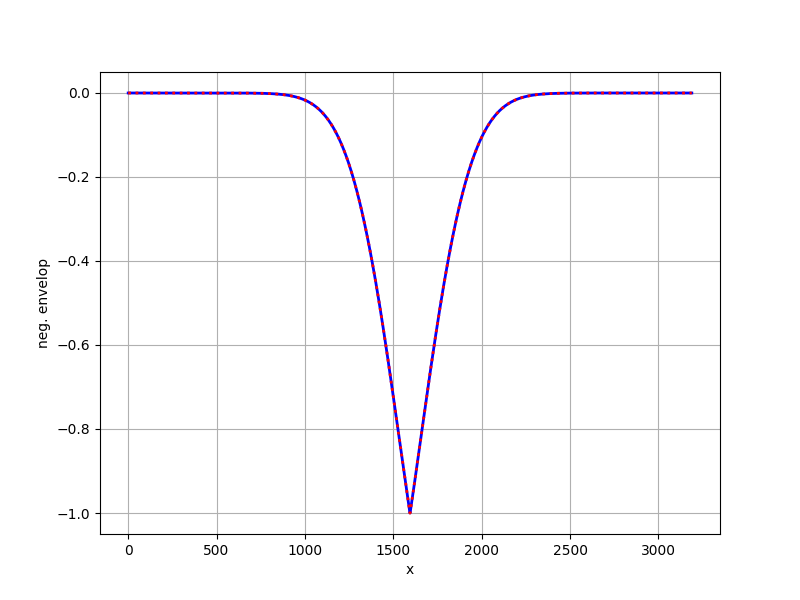



--- Reconstructing the QSVT angles for the same kappa ---
1. The envelop of the QSVT angles are approximated by the computed coefs.
2. The number of the QSVT angles and their absolute amplitudes are taken from the reference QSVT case.

max-abs-err in final reconstructed QSVT angles: 9.481e-14


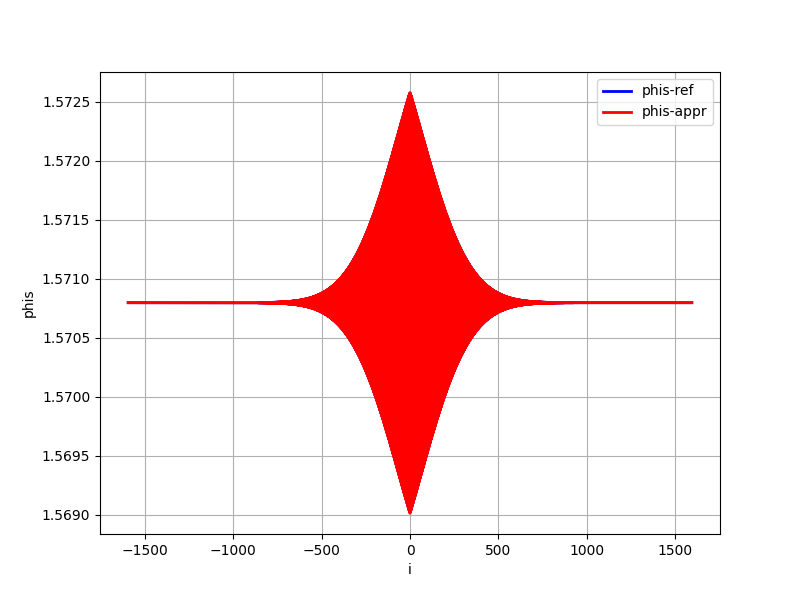

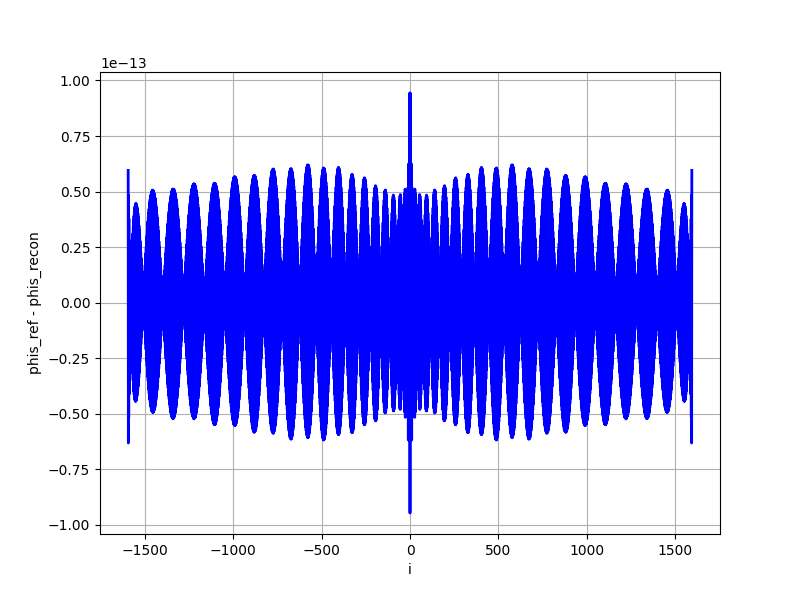

In [18]:
# ----------------------------------------------------------------------------------------
# --- COMPUTE the coefficients to describe the envelop of the QSVT angles ---
# ----------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
coefs_shape_neg_, coefs_shape_pos_, N_half_env_neg_, N_half_env_pos_, phis_appr_ = eqsvt.compute_coefs_envelop(
    dds_[id_comp_],
    Ncoefs = Ncoefs_, 
    flag_plot_envelop = True, 
    flag_plot_shape = True,
    flag_reconstruct = True
)


--------------------------------------------------------------------
N-coefs = 60

full number of angles: 3190
N of NEG. peaks: 1596
N of POS. peaks: 1594

N_env-half-NEG: 798
N_env-half-POS: 797
The envelop for the kappa = 70 is taken.
Normalized POS. ENV: max. absolute error: 2.585e-11
Normalized NEG. ENV: max. absolute error: 2.531e-11

--------------------------------------------------------------------
N-coefs = 50

full number of angles: 3190
N of NEG. peaks: 1596
N of POS. peaks: 1594

N_env-half-NEG: 798
N_env-half-POS: 797
The envelop for the kappa = 70 is taken.
Normalized POS. ENV: max. absolute error: 3.082e-11
Normalized NEG. ENV: max. absolute error: 3.013e-11

--------------------------------------------------------------------
N-coefs = 40

full number of angles: 3190
N of NEG. peaks: 1596
N of POS. peaks: 1594

N_env-half-NEG: 798
N_env-half-POS: 797
The envelop for the kappa = 70 is taken.
Normalized POS. ENV: max. absolute error: 3.784e-11
Normalized NEG. ENV: max. 

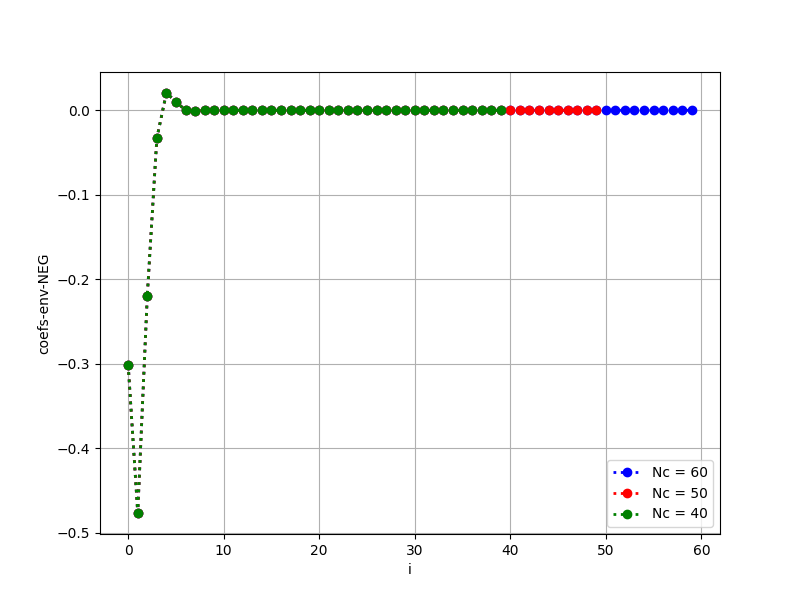

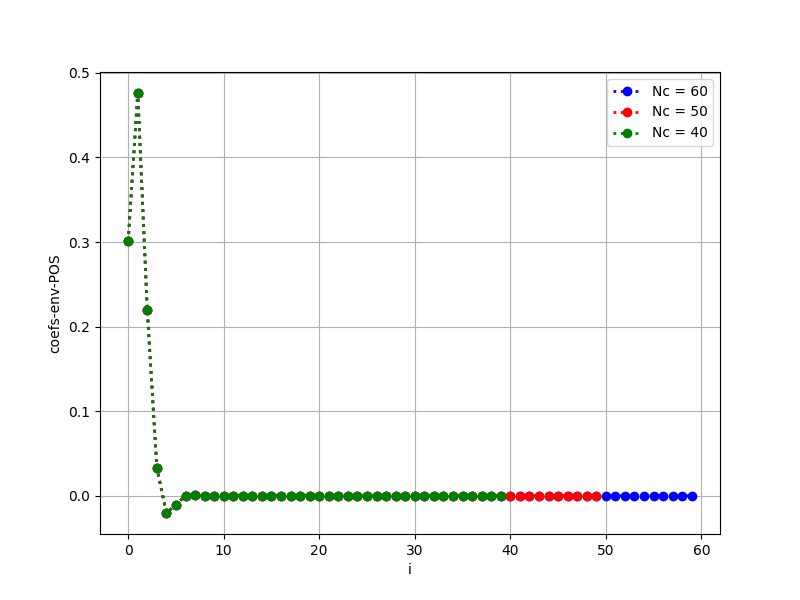

In [19]:
# ------------------------------------------------------
# --- Plot the coefficients for the envelop ---
# ------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.plot_env_coefs(dds_[id_comp_], Ncoefs_arrs = [60, 50, 40])

N-angles: 3190
kappa: 70.0
coef-norm: 1.250e-01

max. angle - np.pi/2: 1.778e-03
min. angle - np.pi/2: -1.783e-03
max-abs-err: 4.445e-10


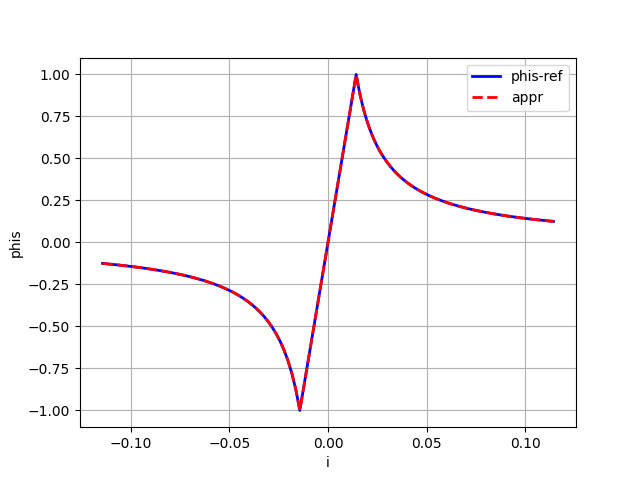

In [20]:
# -------------------------------------------------------
# --- Compute 1/x using a sequence of rotations ---
# -------------------------------------------------------
mix.reload_module(eqsvt)

phi_comp = np.array(phis_appr_)
# phi_comp = np.array(dds_[id_comp_]["phis"])

# padding_array = np.array([np.pi/2.] * 10001)
# phi_comp = np.concatenate(
#     (padding_array, phi_comp, padding_array)
# )

eqsvt.construct_inverse_function(
    phi_comp,
    kappa = dds_[id_comp_]["function-parameter"], 
    coef_norm = dds_[id_comp_]["factor-norm"]
)

In [21]:
# ----------------------------------------------------------------------------------------
# --- Store the computed coefficients ---
# ----------------------------------------------------------------------------------------
mix.reload_module(eqsvt)
eqsvt.store_estimation(
    dds_[id_comp_], fname_, path_root_,
    coefs_ampl_neg_, coefs_ampl_pos_,
    coefs_Na_neg_, coefs_Na_pos_,
    coefs_shape_neg_, coefs_shape_pos_, 
    N_half_env_neg_, N_half_env_pos_
)

Storing the coefficients to:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case4-Nc20.hdf5



full number of angles: 456
N of NEG. peaks: 228
N of POS. peaks: 228

N_env-half-NEG: 114
N_env-half-POS: 114
The envelop for the kappa = 10 is taken.
Normalized POS. ENV: max. absolute error: 4.061e-11
Normalized NEG. ENV: max. absolute error: 5.186e-11

full number of angles: 920
N of NEG. peaks: 460
N of POS. peaks: 460

N_env-half-NEG: 230
N_env-half-POS: 230
The envelop for the kappa = 20 is taken.
Normalized POS. ENV: max. absolute error: 6.175e-11
Normalized NEG. ENV: max. absolute error: 5.338e-11

full number of angles: 1382
N of NEG. peaks: 692
N of POS. peaks: 690

N_env-half-NEG: 346
N_env-half-POS: 345
The envelop for the kappa = 30 is taken.
Normalized POS. ENV: max. absolute error: 5.544e-11
Normalized NEG. ENV: max. absolute error: 5.592e-11

full number of angles: 1842
N of NEG. peaks: 922
N of POS. peaks: 920

N_env-half-NEG: 461
N_env-half-POS: 460
The envelop for the kappa = 40 is taken.
Normalized POS. ENV: max. absolute error: 5.912e-11
Normalized NEG. ENV: max. 

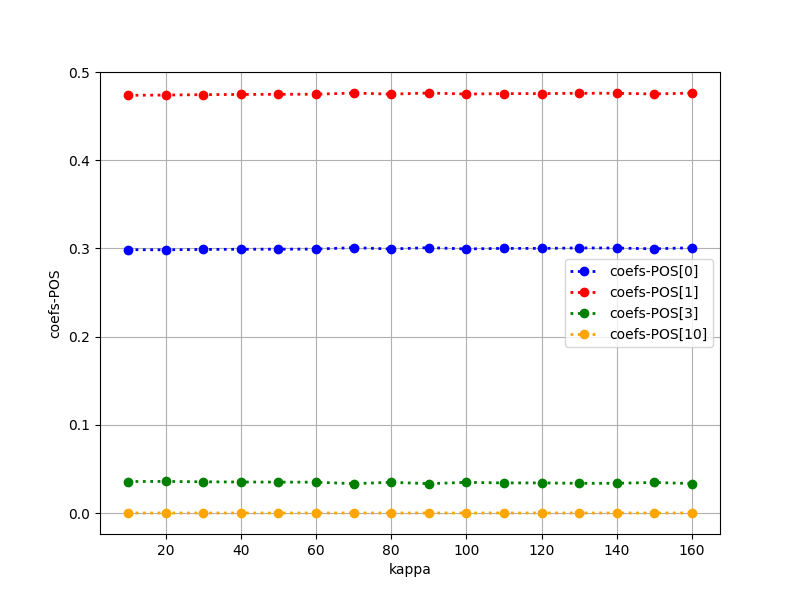

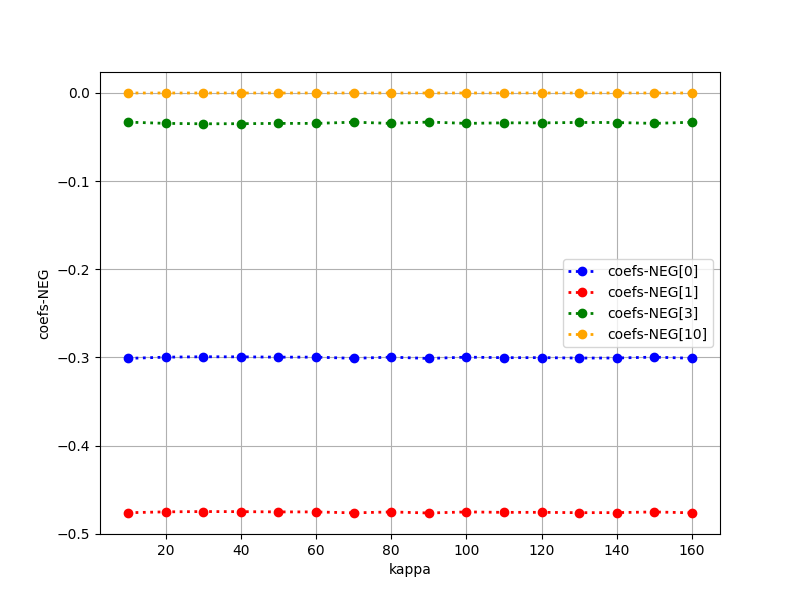

In [23]:
# ---------------------------------------------------------------------------------------------
# --- Plot coefficients-envlop for various reference kappa ---
# ---------------------------------------------------------------------------------------------

mix.reload_module(eqsvt)

def plot_coefs_var_kappa(ids_ch_coef):
    def plot_one(coefs_arr, str_env):
            colors = ["b", "r", "g", "orange", "magenta", "black"]
            fig = plt.figure(figsize=(eqsvt.FIG_SIZE_W_,eqsvt.FIG_SIZE_H_))
            ax = fig.add_subplot(111)
            for ii in range(len(coefs_arr)):
                ax.plot(
                    np.array(range(len(coefs_arr[ii]))), 
                    coefs_arr[ii], 
                    color=colors[ii], linewidth = 2, linestyle=':', marker = "o",
                    label = "kappa = {:d}".format(int(dds_[ii]["function-parameter"]))
                )
            plt.xlabel('i')
            plt.ylabel("coefs-env-{:s}".format(str_env))
            plt.legend()
            plt.grid(True)
            plt.show()
            return
    
    
    def plot_one_coef(coefs_arr, str_coef):
        colors = ["b", "r", "g", "orange", "magenta", "black"]

        fig = plt.figure(figsize=(eqsvt.FIG_SIZE_W_,eqsvt.FIG_SIZE_H_))
        ax = fig.add_subplot(111)
        coefs = np.zeros(len(coefs_arr))
        kappas = np.zeros(len(coefs_arr))
        for ii in range(len(coefs_arr)):
            kappas[ii] = dds_[ii]["function-parameter"]

        counter_1 = -1
        for id_ch_coef in ids_ch_coef:
            counter_1 += 1
            for ii in range(len(coefs_arr)):
                coefs[ii] = coefs_arr[ii][id_ch_coef]
            ax.plot(
                kappas, 
                coefs, 
                color=colors[counter_1], linewidth = 2, linestyle=':', marker = "o",
                label = "coefs-{:s}[{:d}]".format(str_coef, id_ch_coef)

            )
        plt.xlabel('kappa')
        plt.ylabel("coefs-{:s}".format(str_coef))
        plt.grid(True)
        plt.legend()
        plt.show()     
        return
    # ------------------------------------------------------------------
    cns = []
    cps = []
    for dd in dds_:
        cn, cp, _, _, _ = eqsvt.compute_coefs_envelop(
            dd, Ncoefs = Ncoefs_, 
            flag_plot_envelop = False, 
            flag_plot_shape = False,
            flag_reconstruct = False
        )
        cns.append(cn)
        cps.append(cp)

    # plot_one(cns, "NEG")
    # plot_one(cps, "POS")

    plot_one_coef(cps, "POS")
    plot_one_coef(cns, "NEG")
# ----------------------------------------------------------------------

ids_coef = [0, 1, 3, 10]
# ids_coef = [18, 19]
plot_coefs_var_kappa(ids_coef)

del ids_coef

Reading the coefficients from:
 ./tools/QSVT-angles/inversion//QSVT-MI-estimation-coefs-case3-Nc20.hdf5
When simulated:  02/04/2024: 14:45:07
Data for-inversion
kappa: 80.000
factor-norm: 0.125
N-env-half-neg: 1483
N-env-half-pos: 1482
N-coefs-envelop-neg: 20
N-coefs-envelop-pos: 20
Na_rec-rec: 1014
Done.

kappa-goal: 20.0
N-ref: 1014
N-rec: 1014

diff in max, min: 4.658e-10, -4.794e-10
max. abs. err: 1.165e-03


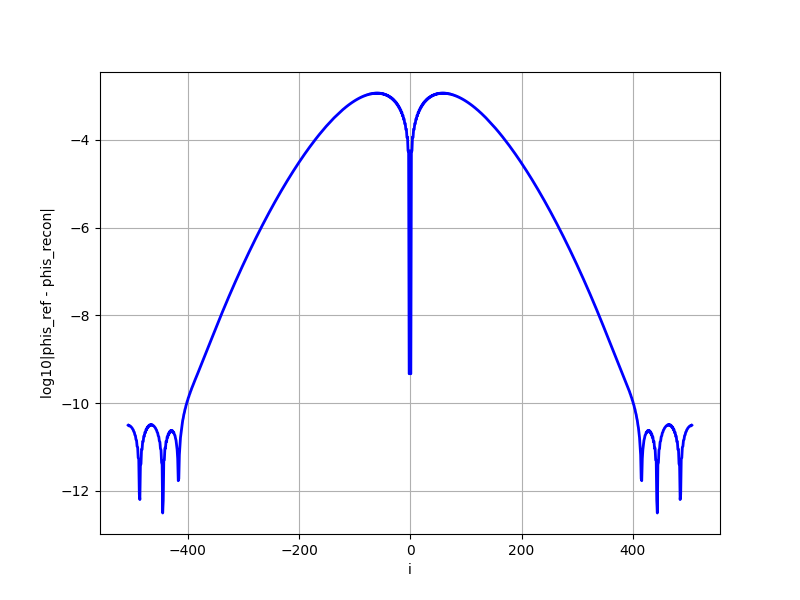

In [21]:
# ---------------------------------------------------------------------------------------------
# --- Compare the reference QSVT angles and the reconstructed angles ---
# ---------------------------------------------------------------------------------------------
# Here the QSVT angles are reconstructed without using any parameters from the reference case.
mix.reload_module(eqsvt)
def compare_angles(phis_ref, phis_rec):
    phis_ch = np.array(phis_ref)

    print("N-ref: {:d}".format(len(phis_ref)))
    print("N-rec: {:d}".format(len(phis_rec)))

    print()
    print("diff in max, min: {:0.3e}, {:0.3e}".format(
        np.max(phis_rec) - np.max(phis_ref),
        np.min(phis_rec) - np.min(phis_ref),
    ))

    max_abs_err = np.max(np.abs(phis_ch - phis_rec))
    print("max. abs. err: {:0.3e}".format(max_abs_err))
    return
# -------------------------------------------------------------------------

id_ch = 0

kappa_ch = dds_[id_ch]["function-parameter"]

temp = eqsvt.extract_env(
    dds_[id_ch]["phis"] - np.pi/2.,
    np.mod(len(dds_[id_ch]["phis"]//2),2)
)

phis_appr_fully, _ = eqsvt.estimate_angles(
    eqsvt.read_estimation(id_case_, Ncoefs_), 
    kappa_goal = kappa_ch,
    # --- comment to compute te actual number of the QSVT estimated angles ---
    Nh_neg_ref = len(temp["neg-i"])//2,
    # Nh_neg_ref = len(temp["neg-i"])//2 + np.mod(len(dds_[id_ch]["phis"])//2,2),
    Nh_pos_ref = len(temp["pos-i"])//2
)

print()
print("kappa-goal: {:0.1f}".format(kappa_ch))
compare_angles(dds_[id_ch]["phis"], phis_appr_fully)


fig = plt.figure(figsize=(eqsvt.FIG_SIZE_W_,eqsvt.FIG_SIZE_H_))
ax = fig.add_subplot(111)
ax.plot(
    np.array(range(len(dds_[id_ch]["phis"]))) - len(dds_[id_ch]["phis"])//2, 
    np.log10(np.abs(phis_appr_fully - dds_[id_ch]["phis"])), 
    color="b", linewidth = 2, linestyle='-'
)
plt.xlabel('i')
plt.ylabel("log10|phis_ref - phis_recon|")
plt.grid(True)
plt.show()





# del phis_appr_fully, kappa_ch

In [44]:
len(temp["pos-i"])

3897

In [20]:
# ----------------------------------------------------------
# --- Store some data for plotting ---
# ----------------------------------------------------------

def save_angles(ids_phis_to_save = [0,1]):
    N_cases = len(ids_phis_to_save)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    count_plot = -1
    for id_counter in range(N_cases):
        id_case = ids_phis_to_save[id_counter]
        
        Nphis = len(dds_[id_case]["phis"]) # even integer
        x_array = np.array(range(Nphis)) - Nphis/2
        phis_ch = dds_[id_case]["phis"] - np.pi/2.
        
        mix.save_dat_plot_1d_file(
            path_save_plots_ + "/phis_k{:d}.dat".format(
                int(dds_[id_case]['function-parameter'])
            ), 
            x_array, 
            phis_ch
        )
        
        
        ax.plot(
            x_array, 
            phis_ch, 
            color=colors_[id_counter], 
            linewidth = 2, linestyle='-'
        )
        
    plt.xlabel('i - N/2')
    plt.ylabel("phis - pi/2")
    plt.grid(True)
    plt.show()
        
    return
# ---------------------------------------------------------------
save_angles(
    dds_[id_comp_], fname_, path_root_
    
)




In [62]:
def get_Na(k):
    temp1 = int(13800./(300. * np.log10(300)) * k * np.log10(k))
    temp2 = int((13800. - 275.)/(300. * np.log10(300)) * k * np.log10(k)) + 275

    if np.mod(temp1, 2) == 1:
        temp1 += 1
    if np.mod(temp2, 2) == 1:
        temp2 += 1

    return temp1, temp2 
# -----------------------------------------------------------------------------------------


get_Na(160)

(6548, 6694)

In [38]:
460 - 185

275